In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [119]:
def gen_data(n_sample=50,dist='uniform',random_var=0):
    """
    Generates data points for a desired distributions and return as numpy array
    """
    
    if dist=='uniform':
        d=np.random.random(size=n_sample)
    if dist=='normal':
        d=np.random.normal(loc=1-random_var,scale=1+random_var,size=n_sample)
    if dist=='binomial':
        d=np.random.binomial(n=10,p=0.5+random_var/10,size=n_sample)
    if dist=='exponential':
        d=np.random.exponential(scale=0.5+random_var,size=n_sample)
    if dist=='poisson':
        d=np.random.poisson(lam=1.0+random_var,size=n_sample)
    if dist=='chisquare':
        d=np.random.chisquare(df=3+int(5*random_var),size=n_sample)
    if dist=='gamma':
        d=np.random.gamma(shape=1.0+random_var,scale=0.5+random_var,size=n_sample)
    if dist=='beta':
        d=np.random.beta(a=0.5+random_var,b=1.0+random_var,size=n_sample)
    if dist=='triangular':
        d=np.random.triangular(left=0.0,mode=np.min([0.5+random_var,1.0]),right=1.0,size=n_sample)
    if dist=='lognormal':
        d=np.random.lognormal(mean=1-random_var,sigma=1+random_var,size=n_sample)
    if dist=='laplace':
        d=np.random.laplace(scale=0.5+random_var,size=n_sample)
        
    # Normalize data
    d = d+np.abs(d.min())
    d = d/(d.max()-d.min())
    
    return d

### Kernel density plots and histograms to test the generative function

/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:330: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)
/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:330: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)
/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:330: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)
/

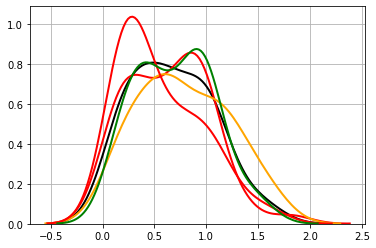

In [120]:
for r in [0.1,0.2,0.3,0.4,0.5]:
    test=gen_data(dist='beta',random_var=r)+gen_data(dist='exponential',random_var=r)
    sns.kdeplot(test,lw=2,c=np.random.choice(['k','orange','blue','green','red']))
    plt.grid(True)
plt.show()

In [121]:
dist_list=['uniform','normal','binomial','exponential','poisson','chisquare','gamma','beta','triangular','lognormal','laplace']

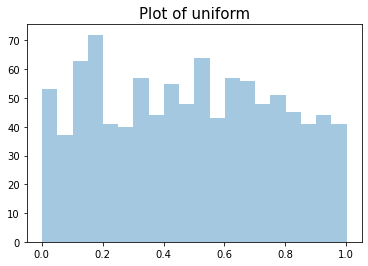

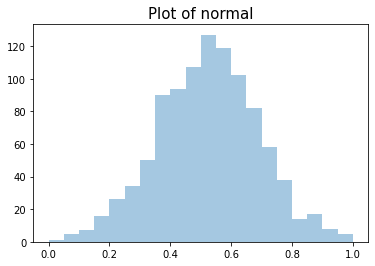

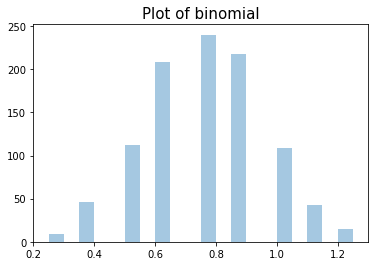

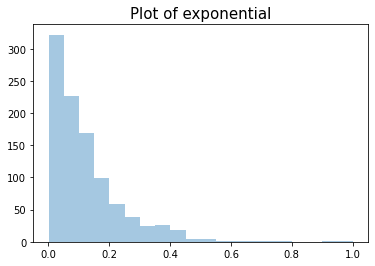

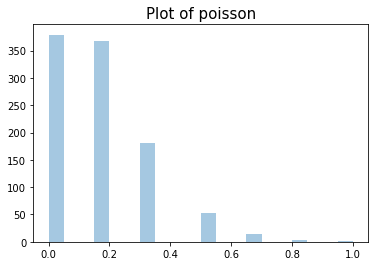

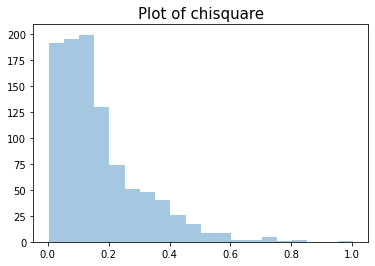

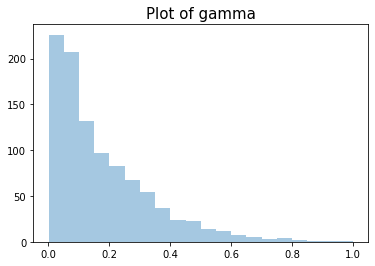

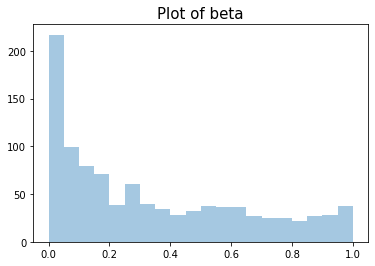

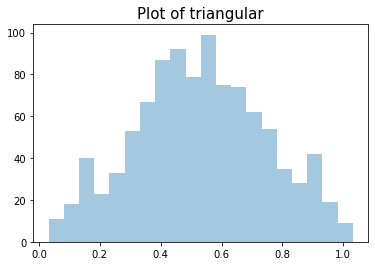

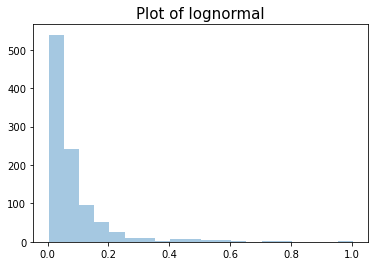

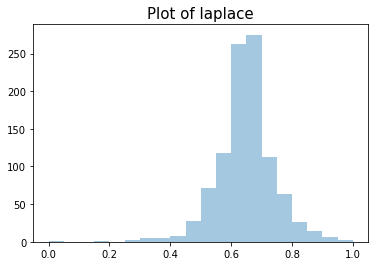

In [122]:
for d in dist_list:
    data = gen_data(n_sample=1000,dist=d)
    plt.title(f"Plot of {d}",fontsize=15)
    sns.distplot(data,kde=False,bins=20)
    plt.show()

In [123]:
def gen_dist_df(n_input=5,n_sample=200,bins=10):
    """
    Generates randomized data sets calling gen_data with various distributions and put them in a DataFrame
    """
    import pandas as pd
    
    df_data={}
    df_data['Data']=[]
    df_data['Histogram']=[]
    df_data['Type']=[]
    dist_list=['uniform','normal','binomial','exponential','poisson','chisquare',\
               'gamma','beta','triangular','lognormal','laplace']
    for i in range(n_input):
        r=np.random.random()
        dist=np.random.choice(dist_list)
        d=gen_data(n_sample=n_sample,dist=dist,random_var=r)
        d=d.reshape(n_sample,)
        df_data['Data'].append(d)
        # Add histogram bin array after range scaling
        hist=np.histogram(d,bins=bins)[0]
        bins=len(hist)
        hist=(hist-hist.min())/(hist.max()-hist.min())
        # Reshape for proper input dimension to the NN
        hist=hist.reshape(bins,)
        df_data['Histogram'].append(hist)
        df_data['Type'].append(dist)
        
    df_data=pd.DataFrame(df_data)
        
    return df_data

In [124]:
n_input=1000
n_sample=500
n_bins=25
n_class=11

In [125]:
df=gen_dist_df(n_input=n_input,n_sample=n_sample,bins=n_bins)

In [126]:
df.head()

,Data,Histogram,Type
0,"[0.0877882013731798, 0.6442255044404996, 0.461...","[0.8666666666666667, 0.4, 0.13333333333333333,...",uniform
1,"[0.4619957831708734, 0.6704497085195764, 0.314...","[0.041666666666666664, 0.041666666666666664, 0...",normal
2,"[0.34628686694314265, 0.47840069290890963, 0.4...","[0.01, 0.0, 0.01, 0.02, 0.04, 0.03, 0.04, 0.15...",laplace
3,"[0.8063375491646113, 0.5667663372918458, 0.873...","[0.5555555555555556, 0.5555555555555556, 0.722...",uniform
4,"[0.22916676503651992, 0.036695372581421595, 0....","[1.0, 0.8888888888888888, 0.6111111111111112, ...",exponential


In [127]:
df['Data'][0].shape

(500,)

In [128]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [129]:
y=df['Type']
num_classes = len(df['Type'].unique())
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)
y = keras.utils.to_categorical(encoded_y,num_classes=num_classes)

In [130]:
X=[]
for i in range(n_input):
    X.append(df['Histogram'][i])

In [131]:
X=np.array(X)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [133]:
X_train[:5]

array([[1.        , 0.70833333, 0.55      , 0.44166667, 0.375     ,
        0.26666667, 0.20833333, 0.13333333, 0.125     , 0.1       ,
        0.04166667, 0.04166667, 0.05833333, 0.03333333, 0.025     ,
        0.        , 0.00833333, 0.00833333, 0.025     , 0.        ,
        0.00833333, 0.        , 0.        , 0.        , 0.00833333],
       [1.        , 0.78378378, 0.62162162, 0.54954955, 0.40540541,
        0.31531532, 0.21621622, 0.14414414, 0.11711712, 0.09009009,
        0.04504505, 0.05405405, 0.03603604, 0.05405405, 0.        ,
        0.02702703, 0.00900901, 0.01801802, 0.        , 0.00900901,
        0.        , 0.        , 0.        , 0.        , 0.00900901],
       [0.03614458, 0.        , 0.04819277, 0.07228916, 0.10843373,
        0.10843373, 0.22891566, 0.31325301, 0.55421687, 0.63855422,
        0.79518072, 1.        , 0.72289157, 0.5060241 , 0.19277108,
        0.20481928, 0.18072289, 0.09638554, 0.07228916, 0.04819277,
        0.01204819, 0.02409639, 0.02409639, 0.

In [134]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [135]:
input_dim=X.shape[1]
output_dim=num_classes

In [136]:
def build_NN_model(input_dim,num_classes,n_hidden_layers=1,layer_architecture=None,dropout_prob=0.25,activation_func='relu'):
    """
    Builds and returns a feed-forward multi-layer neural network
    n_hidden_layers: Number of hidden layers
    layer_architecture: Nuerons per hidden layer, must be a list with neurons per layer
                        e.g. [10,5] and length must match the number of layers
    """
    model = Sequential()
    model.add(Dense(layer_architecture[0], input_shape=(input_dim,),activation='relu'))
    if len(layer_architecture)>1:
        for i in layer_architecture[1:]:
            model.add(Dense(i, activation='relu'))
            model.add(Dropout(rate=dropout_prob))
    model.add(Dense(num_classes, activation='softmax'))
    #print(model.summary())
    return model

In [137]:
model=build_NN_model(input_dim=input_dim,num_classes=num_classes,n_hidden_layers=2,layer_architecture=[10,10])

In [138]:
#neuron_layer_1=20
#neuron_layer_2=10
#dropout_prob=0.25
#activation_func='relu'
num_epochs=200
batch_size=32
learning_rate=0.001

In [139]:
optimizer=keras.optimizers.Adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

### Training the model

In [140]:
from keras.callbacks import ModelCheckpoint   

# save best model as checkpointer
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=0, 
                               save_best_only=True)
# train the model
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
          validation_data=(X_val, y_val), callbacks=[checkpointer], 
          verbose=1, shuffle=False)

Epoch 1/200
19/19 [==============================] - 0s 10ms/step - loss: 2.4300 - accuracy: 0.1017 - val_loss: 2.3891 - val_accuracy: 0.0700
Epoch 2/200
19/19 [==============================] - 0s 3ms/step - loss: 2.3906 - accuracy: 0.1467 - val_loss: 2.3652 - val_accuracy: 0.1600
Epoch 3/200
19/19 [==============================] - 0s 3ms/step - loss: 2.3598 - accuracy: 0.1683 - val_loss: 2.3436 - val_accuracy: 0.2200
Epoch 4/200
19/19 [==============================] - 0s 3ms/step - loss: 2.3408 - accuracy: 0.1967 - val_loss: 2.3196 - val_accuracy: 0.2300
Epoch 5/200
19/19 [==============================] - 0s 3ms/step - loss: 2.3094 - accuracy: 0.1867 - val_loss: 2.2928 - val_accuracy: 0.2300
Epoch 6/200
19/19 [==============================] - 0s 3ms/step - loss: 2.2793 - accuracy: 0.2133 - val_loss: 2.2613 - val_accuracy: 0.2300
Epoch 7/200
19/19 [==============================] - 0s 3ms/step - loss: 2.2461 - accuracy: 0.2450 - val_loss: 2.2228 - val_accuracy: 0.3000
Epoch 8/200


Epoch 59/200
19/19 [==============================] - 0s 3ms/step - loss: 0.7987 - accuracy: 0.6917 - val_loss: 0.5523 - val_accuracy: 0.8200
Epoch 60/200
19/19 [==============================] - 0s 3ms/step - loss: 0.7377 - accuracy: 0.7200 - val_loss: 0.5446 - val_accuracy: 0.8250
Epoch 61/200
19/19 [==============================] - 0s 3ms/step - loss: 0.7235 - accuracy: 0.7117 - val_loss: 0.5350 - val_accuracy: 0.8200
Epoch 62/200
19/19 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.7517 - val_loss: 0.5311 - val_accuracy: 0.8200
Epoch 63/200
19/19 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.7433 - val_loss: 0.5188 - val_accuracy: 0.8200
Epoch 64/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.7650 - val_loss: 0.5093 - val_accuracy: 0.8250
Epoch 65/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.7283 - val_loss: 0.5036 - val_accuracy: 0.8250
Epoch 

19/19 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.8083 - val_loss: 0.3524 - val_accuracy: 0.8550
Epoch 117/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.8083 - val_loss: 0.3509 - val_accuracy: 0.8600
Epoch 118/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5438 - accuracy: 0.7850 - val_loss: 0.3497 - val_accuracy: 0.8550
Epoch 119/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5309 - accuracy: 0.8000 - val_loss: 0.3541 - val_accuracy: 0.8550
Epoch 120/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7833 - val_loss: 0.3498 - val_accuracy: 0.8550
Epoch 121/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.8150 - val_loss: 0.3434 - val_accuracy: 0.8650
Epoch 122/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.7767 - val_loss: 0.3406 - val_accuracy: 0.8600
Epoch 123/200

19/19 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.8150 - val_loss: 0.3094 - val_accuracy: 0.8600
Epoch 174/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.8150 - val_loss: 0.3014 - val_accuracy: 0.8700
Epoch 175/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8317 - val_loss: 0.3025 - val_accuracy: 0.8600
Epoch 176/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.8050 - val_loss: 0.3041 - val_accuracy: 0.8600
Epoch 177/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8217 - val_loss: 0.3090 - val_accuracy: 0.8650
Epoch 178/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8083 - val_loss: 0.3110 - val_accuracy: 0.8550
Epoch 179/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8000 - val_loss: 0.3125 - val_accuracy: 0.8600
Epoch 180/200

### Test the model performance

In [141]:
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(X_test, y_test,verbose=0)
print("Test score: ", score[1])

Test score:  0.9200000166893005


### Plot the validation set loss and accuracy over epochs

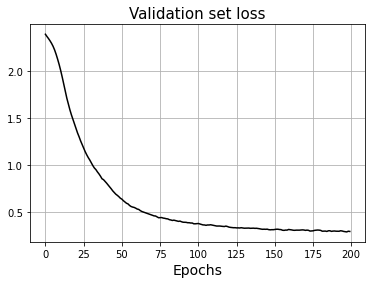

In [142]:
plt.plot(hist.history['val_loss'],color='k')
plt.title("Validation set loss",fontsize=15)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.show()